# Example 2 with sci-kit learn models

This notebook shows an example of using synthetic control in a situation where we do not have untreated control units of a similar nature to the treated unit. So in this example we just have a single time series of observations and the predictor variables are simply time and month.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

import causalpy as cp

## Load data

In [2]:
df = (
    cp.load_data("its")
    .assign(date=lambda x: pd.to_datetime(x["date"]))
    .set_index("date")
)

treatment_time = pd.to_datetime("2017-01-01")
df.head()

month  year  t          y
date                                 
2010-01-31      1  2010  0  25.058186
2010-02-28      2  2010  1  27.189812
2010-03-31      3  2010  2  26.487551
2010-04-30      4  2010  3  31.241716
2010-05-31      5  2010  4  40.753973

## Run the analysis

In [3]:
result = cp.skl_experiments.SyntheticControl(
    df,
    treatment_time,
    formula="y ~ 1 + t + C(month)",
    model=LinearRegression(),
)

## Examine the results

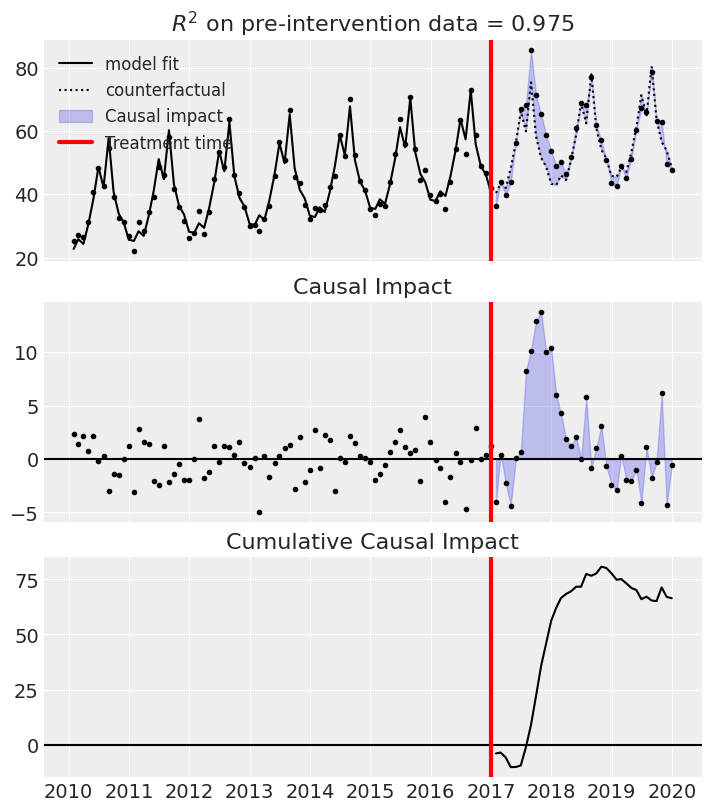

In [4]:
fig, ax = result.plot();